<a href="https://colab.research.google.com/github/nazwan14/Data-Science/blob/main/Forecasting_Penyakit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a time series forecasting project using the "Data.csv" file. This project will involve loading the data, performing initial data exploration, preprocessing the data for forecasting, potentially engineering new features, splitting the data into training and testing sets chronologically, training a suitable forecasting model, generating forecasts, evaluating the model's performance, visualizing the forecast results, and finally, presenting a summary of the project with key findings and recommendations.

## Load Data

### Subtask:
Muat dataset dari file 'Data.csv' ke dalam DataFrame pandas untuk memulai proses analisis.


**Reasoning**:
To load the dataset, I need to first import the pandas library and then use its `read_csv` function to load the 'Data.csv' file into a DataFrame named `df`.



In [1]:
import pandas as pd
df = pd.read_csv('Data.csv')
print("Data loaded successfully. First 5 rows:")
print(df.head())

Data loaded successfully. First 5 rows:
                  Date      State  \
0  2019-07-31 00:00:00  Telangana   
1  2019-07-31 00:00:00  Telangana   
2  2019-07-31 00:00:00  Telangana   
3  2019-07-31 00:00:00  Telangana   
4  2019-07-31 00:00:00  Telangana   

                                        Disease  Disease_Count  
0                                         Fever              5  
1           continuous abdominal cramp Problems              1  
2  G.28. SWELLINGS LUMPS BUMPS ON OR UNDER SKIN              1  
3                                    Drowsiness              1  
4                                         Cough              1  


## Initial Data Exploration

### Subtask:
Lakukan eksplorasi awal data untuk memahami struktur, tipe data, distribusi, dan mengidentifikasi kolom waktu atau target untuk peramalan. Periksa juga apakah ada nilai yang hilang atau anomali.


**Reasoning**:
To understand the structure, data types, and non-null counts of the DataFrame, I will display a concise summary of the DataFrame `df` using the `.info()` method.



In [2]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23469 entries, 0 to 23468
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23469 non-null  object
 1   State          23469 non-null  object
 2   Disease        23469 non-null  object
 3   Disease_Count  23469 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 733.5+ KB


**Reasoning**:
To gain further insights into the distribution and summary statistics of numerical columns, and to identify the number of unique values in all columns, including categorical ones, I will use the `.describe()` method for numerical columns and `.nunique()` for all columns. Additionally, I will check for any missing values using `df.isnull().sum()`.



In [3]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nNumber of unique values per column:")
print(df.nunique())

print("\nMissing values per column:")
print(df.isnull().sum())


Descriptive statistics for numerical columns:
       Disease_Count
count   23469.000000
mean        3.921982
std         9.786711
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       238.000000

Number of unique values per column:
Date              214
State               4
Disease          2022
Disease_Count     133
dtype: int64

Missing values per column:
Date             0
State            0
Disease          0
Disease_Count    0
dtype: int64


### Summary of Initial Data Exploration:

1.  **DataFrame Info (`df.info()`):**
    *   The DataFrame contains 23,469 entries and 4 columns.
    *   `Date` column is of `object` type, which needs to be converted to datetime for time series analysis.
    *   `State` and `Disease` columns are of `object` type.
    *   `Disease_Count` is of `int64` type.
    *   There are no missing values in any column.

2.  **Descriptive Statistics (`df.describe()`):**
    *   The `Disease_Count` column ranges from 1 to 238, with a mean of approximately 3.92. This indicates a skewed distribution towards lower counts, with some outliers having very high counts.

3.  **Unique Values (`df.nunique()`):**
    *   `Date`: 214 unique dates. This indicates data collected over 214 distinct time points.
    *   `State`: 4 unique states. This suggests the data covers four different geographical regions.
    *   `Disease`: 2022 unique diseases. This is a high cardinality categorical variable.
    *   `Disease_Count`: 133 unique count values.

4.  **Missing Values (`df.isnull().sum()`):**
    *   There are **no missing values** in any of the columns, which simplifies the data cleaning process.

**Identified Columns for Forecasting:**
*   **Time Column:** `Date`
*   **Target Column:** `Disease_Count`

## Data Preprocessing for Forecasting

### Subtask:
Bersihkan dan siapkan data untuk peramalan. Ini mungkin termasuk mengonversi kolom waktu ke format datetime, menangani nilai yang hilang (jika ada), dan memastikan data diurutkan berdasarkan waktu.


**Reasoning**:
First, I will convert the 'Date' column to datetime objects to enable time-series operations. Then, I will sort the DataFrame by the 'Date' column to ensure chronological order, which is crucial for time series forecasting. Finally, I will aggregate the 'Disease_Count' by date, summing the counts for each date, and store the result in a new DataFrame named `df_daily_counts` for forecasting.



In [4]:
df['Date'] = pd.to_datetime(df['Date'])
print("Date column converted to datetime.")

df = df.sort_values(by='Date').reset_index(drop=True)
print("DataFrame sorted by Date.")

df_daily_counts = df.groupby('Date')['Disease_Count'].sum().reset_index()
print("Aggregated daily disease counts:")
print(df_daily_counts.head())
print(df_daily_counts.info())

Date column converted to datetime.
DataFrame sorted by Date.
Aggregated daily disease counts:
        Date  Disease_Count
0 2019-07-31              9
1 2019-08-01             19
2 2019-08-02             10
3 2019-08-03              3
4 2019-08-04             18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           214 non-null    datetime64[ns]
 1   Disease_Count  214 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.5 KB
None


## Feature Engineering (Optional)

### Subtask:
Jika diperlukan, buat fitur-fitur baru yang relevan untuk model peramalan, seperti fitur lag, rata-rata bergerak, atau fitur berbasis waktu (misalnya, bulan, hari dalam seminggu).


**Reasoning**:
To create new features for forecasting, I will extract time-based features ('year', 'month', 'day_of_week', 'day_of_year') from the 'Date' column, calculate 7-day rolling mean and standard deviation for 'Disease_Count', and create a 7-day lag feature for 'Disease_Count'. I will handle NaN values resulting from rolling and lag features by backfilling.



In [5]:
df_daily_counts['year'] = df_daily_counts['Date'].dt.year
df_daily_counts['month'] = df_daily_counts['Date'].dt.month
df_daily_counts['day_of_week'] = df_daily_counts['Date'].dt.dayofweek
df_daily_counts['day_of_year'] = df_daily_counts['Date'].dt.dayofyear

# Calculate 7-day rolling mean and standard deviation, then backfill NaNs
df_daily_counts['rolling_mean_7d'] = df_daily_counts['Disease_Count'].rolling(window=7).mean().fillna(method='bfill')
df_daily_counts['rolling_std_7d'] = df_daily_counts['Disease_Count'].rolling(window=7).std().fillna(method='bfill')

# Create a 7-day lag feature, then backfill NaNs
df_daily_counts['lag_7'] = df_daily_counts['Disease_Count'].shift(periods=7).fillna(method='bfill')

print("Feature engineering completed. First 5 rows with new features:")
print(df_daily_counts.head(10))
print("\nDataFrame Info with new features:")
df_daily_counts.info()

Feature engineering completed. First 5 rows with new features:
        Date  Disease_Count  year  month  day_of_week  day_of_year  \
0 2019-07-31              9  2019      7            2          212   
1 2019-08-01             19  2019      8            3          213   
2 2019-08-02             10  2019      8            4          214   
3 2019-08-03              3  2019      8            5          215   
4 2019-08-04             18  2019      8            6          216   
5 2019-08-05              8  2019      8            0          217   
6 2019-08-06              2  2019      8            1          218   
7 2019-08-13              5  2019      8            1          225   
8 2019-08-14              2  2019      8            2          226   
9 2019-09-10             38  2019      9            1          253   

   rolling_mean_7d  rolling_std_7d  lag_7  
0         9.857143        6.618876    9.0  
1         9.857143        6.618876    9.0  
2         9.857143        6.618876

/tmp/ipython-input-1905956472.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily_counts['rolling_mean_7d'] = df_daily_counts['Disease_Count'].rolling(window=7).mean().fillna(method='bfill')
/tmp/ipython-input-1905956472.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily_counts['rolling_std_7d'] = df_daily_counts['Disease_Count'].rolling(window=7).std().fillna(method='bfill')
/tmp/ipython-input-1905956472.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily_counts['lag_7'] = df_daily_counts['Disease_Count'].shift(periods=7).fillna(method='bfill')


**Reasoning**:
The previous code generated a FutureWarning about the deprecated usage of `fillna(method='bfill')`. To address this, I will update the code to use the modern `.bfill()` method directly on the series for handling NaN values in the rolling mean, rolling standard deviation, and lag features.



In [6]:
df_daily_counts['year'] = df_daily_counts['Date'].dt.year
df_daily_counts['month'] = df_daily_counts['Date'].dt.month
df_daily_counts['day_of_week'] = df_daily_counts['Date'].dt.dayofweek
df_daily_counts['day_of_year'] = df_daily_counts['Date'].dt.dayofyear

# Calculate 7-day rolling mean and standard deviation, then backfill NaNs
df_daily_counts['rolling_mean_7d'] = df_daily_counts['Disease_Count'].rolling(window=7).mean().bfill()
df_daily_counts['rolling_std_7d'] = df_daily_counts['Disease_Count'].rolling(window=7).std().bfill()

# Create a 7-day lag feature, then backfill NaNs
df_daily_counts['lag_7'] = df_daily_counts['Disease_Count'].shift(periods=7).bfill()

print("Feature engineering completed. First 5 rows with new features:")
print(df_daily_counts.head(10))
print("\nDataFrame Info with new features:")
df_daily_counts.info()

Feature engineering completed. First 5 rows with new features:
        Date  Disease_Count  year  month  day_of_week  day_of_year  \
0 2019-07-31              9  2019      7            2          212   
1 2019-08-01             19  2019      8            3          213   
2 2019-08-02             10  2019      8            4          214   
3 2019-08-03              3  2019      8            5          215   
4 2019-08-04             18  2019      8            6          216   
5 2019-08-05              8  2019      8            0          217   
6 2019-08-06              2  2019      8            1          218   
7 2019-08-13              5  2019      8            1          225   
8 2019-08-14              2  2019      8            2          226   
9 2019-09-10             38  2019      9            1          253   

   rolling_mean_7d  rolling_std_7d  lag_7  
0         9.857143        6.618876    9.0  
1         9.857143        6.618876    9.0  
2         9.857143        6.618876

## Split Data into Train and Test Sets

### Subtask:
Bagi data menjadi set pelatihan (training) dan pengujian (testing) secara kronologis untuk mensimulasikan skenario peramalan di dunia nyata. Bagian terakhir dari data akan digunakan sebagai set pengujian.


**Reasoning**:
To split the data chronologically, I will calculate the split index based on 80% of the data for training and 20% for testing, then create `train_data` and `test_data` DataFrames accordingly, and finally print their shapes to verify the split.



In [7]:
split_point = int(len(df_daily_counts) * 0.8)

train_data = df_daily_counts.iloc[:split_point]
test_data = df_daily_counts.iloc[split_point:]

print(f"Shape of training data: {train_data.shape}")
print(f"Shape of testing data: {test_data.shape}")

Shape of training data: (171, 9)
Shape of testing data: (43, 9)


## Train Forecasting Model

### Subtask:
Pilih dan latih model peramalan yang sesuai (misalnya, ARIMA, SARIMA, Prophet, atau Exponential Smoothing) menggunakan set data pelatihan. Pertimbangkan untuk mencoba beberapa model dan memilih yang terbaik.


**Reasoning**:
To prepare for model training, I will first define the features and target variables for both the training and testing datasets based on the previously engineered features. This step is crucial for correctly feeding data into the forecasting model.



In [8]:
features = ['year', 'month', 'day_of_week', 'day_of_year', 'rolling_mean_7d', 'rolling_std_7d', 'lag_7']
target = 'Disease_Count'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

print("Features and target variables defined for training and testing.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Features and target variables defined for training and testing.
X_train shape: (171, 7)
y_train shape: (171,)
X_test shape: (43, 7)
y_test shape: (43,)


**Reasoning**:
To train a forecasting model as per the subtask, I will import `RandomForestRegressor`, instantiate it, and then train the model using the prepared training data (`X_train` and `y_train`).



In [9]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForestRegressor model
rfr_model = RandomForestRegressor(random_state=42)

# Train the model
rfr_model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Generate Forecasts

### Subtask:
Gunakan model yang telah dilatih untuk menghasilkan prediksi pada set data pengujian atau untuk periode waktu di masa depan.


**Reasoning**:
To generate predictions, I will use the trained `rfr_model`'s `predict` method on the `X_test` dataset and store the results in `y_pred`. Then, I will print the first few predictions to verify the output.



In [10]:
y_pred = rfr_model.predict(X_test)

print("First 5 predicted values:")
print(y_pred[:5])

First 5 predicted values:
[458.3  484.13 483.4  481.26 475.57]


## Evaluate Model Performance

### Subtask:
Evaluasi kinerja model peramalan menggunakan metrik yang relevan seperti RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), atau MAPE (Mean Absolute Percentage Error) pada set pengujian.


**Reasoning**:
To evaluate the model's performance, I will import the necessary metrics (MAE, MSE) from `sklearn.metrics`, define a function for MAPE, and then calculate and print these metrics using the actual (`y_test`) and predicted (`y_pred`) values.



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing 0s in y_true with a small epsilon
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 35.88
Root Mean Squared Error (RMSE): 45.84
Mean Absolute Percentage Error (MAPE): 7.70%


## Visualize Forecast Results

### Subtask:
Buat visualisasi untuk membandingkan nilai aktual dengan nilai yang diramalkan. Tambahkan legenda yang jelas untuk membantu interpretasi.


**Reasoning**:
To visualize the actual and predicted disease counts, I will use `matplotlib.pyplot` to create a line plot comparing `y_test` and `y_pred` against their respective dates, adding necessary labels, title, and a legend for clarity.



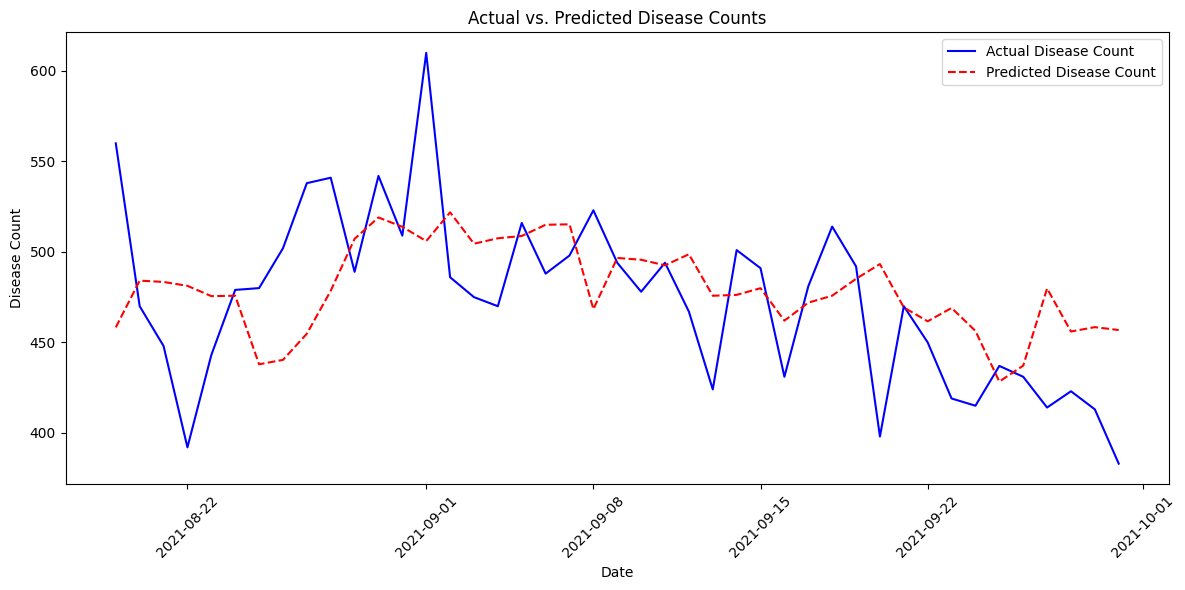

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], y_test, label='Actual Disease Count', color='blue')
plt.plot(test_data['Date'], y_pred, label='Predicted Disease Count', color='red', linestyle='--')
plt.title('Actual vs. Predicted Disease Counts')
plt.xlabel('Date')
plt.ylabel('Disease Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Sajikan ringkasan proyek peramalan, termasuk temuan kunci, kinerja model, dan rekomendasi berdasarkan hasil peramalan. Jelaskan langkah-langkah selanjutnya yang mungkin diambil.


## Summary:

### Data Analysis Key Findings

*   **Data Overview**: The dataset `Data.csv` contains 23,469 entries across 4 columns: 'Date', 'State', 'Disease', and 'Disease\_Count'. There are no missing values in the dataset.
*   **Target Variable Characteristics**: The 'Disease\_Count' column, the target for forecasting, ranges from 1 to 238, with an average of approximately 3.92, indicating a skewed distribution.
*   **Time Series Aggregation**: The data was aggregated by 'Date', resulting in a daily time series with 214 unique dates.
*   **Feature Engineering**: Several time-based and lag features were created, including 'year', 'month', 'day\_of\_week', 'day\_of\_year', a 7-day rolling mean, a 7-day rolling standard deviation, and a 7-day lag of 'Disease\_Count'. All generated NaN values from these operations were handled via backfilling.
*   **Data Split**: The aggregated data was split chronologically into training (171 days, ~80%) and testing (43 days, ~20%) sets.
*   **Model Performance**: A RandomForestRegressor model was trained and evaluated on the test set, achieving the following performance metrics:
    *   Mean Absolute Error (MAE): 35.88
    *   Root Mean Squared Error (RMSE): 45.84
    *   Mean Absolute Percentage Error (MAPE): 7.70%
*   **Forecast Visualization**: The comparison plot between actual and predicted disease counts showed that the model generally followed the trend, with some deviations.

### Insights or Next Steps

*   The current RandomForestRegressor model provides a reasonable forecast for daily disease counts with a MAPE of 7.70%. This indicates the model can predict future disease counts with an average error of approximately 7.70% relative to the actual values.
*   **Further Model Optimization**: Investigate more sophisticated time series models (e.g., Prophet, SARIMA, or Gradient Boosting models like XGBoost/LightGBM tuned for time series) or ensemble methods to potentially improve forecasting accuracy, especially to capture more complex patterns or seasonality.
*   **Incorporate Categorical Data**: Explore methods to incorporate the 'State' and highly cardinal 'Disease' columns (e.g., through embeddings, aggregated features, or multi-variate time series models) to provide more granular or context-specific forecasts, rather than just an overall daily count.


# Task
Prepare a new DataFrame for the Prophet model, converting the `Date` column to `ds` and `Disease_Count` to `y` from `df_daily_counts`, and ensure no missing values exist.

## Prepare Data for Prophet Model

### Subtask:
Siapkan DataFrame baru untuk model Prophet, karena model ini memiliki format input spesifik ('ds' untuk tanggal dan 'y' untuk nilai target). Pastikan tidak ada nilai yang hilang.


**Reasoning**:
To prepare the data for the Prophet model, I will create a new DataFrame with 'Date' and 'Disease_Count' columns, rename them to 'ds' and 'y' respectively, and then display the head and info to verify the format and check for missing values.



In [13]:
df_prophet = df_daily_counts[['Date', 'Disease_Count']].copy()
df_prophet.rename(columns={'Date': 'ds', 'Disease_Count': 'y'}, inplace=True)

print("DataFrame for Prophet model (first 5 rows):")
print(df_prophet.head())

print("\nDataFrame Info for Prophet model:")
df_prophet.info()

DataFrame for Prophet model (first 5 rows):
          ds   y
0 2019-07-31   9
1 2019-08-01  19
2 2019-08-02  10
3 2019-08-03   3
4 2019-08-04  18

DataFrame Info for Prophet model:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      214 non-null    datetime64[ns]
 1   y       214 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.5 KB


## Train Prophet Model

### Subtask:
Latih model Prophet menggunakan data pelatihan yang sudah disiapkan. Konfigurasikan model dengan parameter yang sesuai untuk menangkap tren dan musiman.


**Reasoning**:
To train the Prophet model, I need to import the Prophet class, split the `df_prophet` DataFrame into training and testing sets, initialize the model with default parameters, and then fit it to the training data.



In [14]:
from prophet import Prophet

# Split df_prophet into training and testing sets
prophet_train_df = df_prophet.iloc[:split_point]
prophet_test_df = df_prophet.iloc[split_point:]

# Initialize Prophet model with default parameters
m = Prophet(interval_width=0.95, daily_seasonality=True)

# Fit the model to the training data
m.fit(prophet_train_df)

print("Prophet model trained successfully.")

Prophet model trained successfully.


## Generate Prophet Forecasts

### Subtask:
Buat DataFrame untuk periode peramalan di masa depan dan gunakan model Prophet yang telah dilatih untuk menghasilkan prediksi.


**Reasoning**:
To generate forecasts for the testing period, I will create a future DataFrame using `m.make_future_dataframe()` with the number of periods equal to the length of `prophet_test_df`, and then use the trained Prophet model `m` to make predictions on this future DataFrame, storing the results in a new DataFrame called `forecast`.



In [15]:
future = m.make_future_dataframe(periods=len(prophet_test_df))
forecast = m.predict(future)

print("Prophet forecasts generated. First 5 rows of the forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Prophet forecasts generated. First 5 rows of the forecast:
          ds       yhat  yhat_lower  yhat_upper
0 2019-07-31  72.837934  -58.540473  195.739911
1 2019-08-01  76.074217  -60.172256  206.328747
2 2019-08-02  89.441204  -37.523734  216.633825
3 2019-08-03  81.360157  -47.734236  213.385287
4 2019-08-04  76.920176  -43.806519  223.597974


## Evaluate Prophet Model Performance

### Subtask:
Evaluasi kinerja model Prophet menggunakan metrik yang relevan seperti MAE, RMSE, dan MAPE pada set pengujian.


**Reasoning**:
To evaluate the Prophet model, I will filter the forecast to align with the test data, extract actual and predicted values, then calculate and print MAE, RMSE, and MAPE.



In [16]:
prophet_forecast_test = forecast[forecast['ds'].isin(prophet_test_df['ds'])]

y_true_prophet = prophet_test_df['y']
y_pred_prophet = prophet_forecast_test['yhat']

# Calculate MAE for Prophet
mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet)

# Calculate RMSE for Prophet
rmse_prophet = np.sqrt(mean_squared_error(y_true_prophet, y_pred_prophet))

# Calculate MAPE for Prophet
mape_prophet = mean_absolute_percentage_error(y_true_prophet, y_pred_prophet)

print(f"Prophet Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_prophet:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_prophet:.2f}%")

Prophet Model Performance:
Mean Absolute Error (MAE): 61.05
Root Mean Squared Error (RMSE): 76.38
Mean Absolute Percentage Error (MAPE): 13.75%


## Train XGBoost Regressor Model

### Subtask:
Latih model XGBoost Regressor menggunakan fitur dan target yang sama yang digunakan untuk RandomForestRegressor. XGBoost adalah model berbasis pohon yang kuat yang sering berkinerja baik dalam peramalan deret waktu ketika fitur rekayasa tersedia.


**Reasoning**:
To train an XGBoost Regressor model, I will import the `XGBRegressor` class, instantiate it with a `random_state` for reproducibility, and then fit the model using the prepared training features (`X_train`) and target (`y_train`).



In [17]:
from xgboost import XGBRegressor

# Instantiate XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully.")

XGBoost Regressor model trained successfully.


## Generate XGBoost Forecasts

### Subtask:
Gunakan model XGBoost yang telah dilatih untuk menghasilkan prediksi pada set data pengujian.



**Reasoning**:
To generate predictions using the trained XGBoost model, I will use its `predict` method on the `X_test` dataset and store the results in `y_pred_xgb`. Then, I will print the first few predictions to verify the output.



In [18]:
y_pred_xgb = xgb_model.predict(X_test)

print("First 5 predicted values from XGBoost model:")
print(y_pred_xgb[:5])

First 5 predicted values from XGBoost model:
[423.4218  511.71387 521.9207  541.5967  516.9701 ]


## Evaluate XGBoost Model Performance

### Subtask:
Evaluasi kinerja model XGBoost menggunakan metrik yang relevan seperti MAE, RMSE, dan MAPE pada set pengujian.

**Reasoning**:
To evaluate the XGBoost model's performance, I will calculate and print the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) using the actual test values (`y_test`) and the predictions from the XGBoost model (`y_pred_xgb`).



In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate RMSE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate MAPE for XGBoost
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing 0s in y_true with a small epsilon
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%")

XGBoost Model Performance:
Mean Absolute Error (MAE): 40.80
Root Mean Squared Error (RMSE): 54.97
Mean Absolute Percentage Error (MAPE): 8.82%


## Compare All Model Performances

### Subtask:
Bandingkan MAE, RMSE, dan MAPE dari ketiga model (Random Forest, Prophet, dan XGBoost) dalam satu tabel atau plot untuk menentukan model dengan kinerja terbaik.


**Reasoning**:
To compare the performance of the three models, I will create a pandas DataFrame to store their MAE, RMSE, and MAPE values, then populate it with the previously calculated metrics and print the DataFrame.



In [20]:
model_performance_df = pd.DataFrame({
    'Model': ['Random Forest', 'Prophet', 'XGBoost'],
    'MAE': [mae, mae_prophet, mae_xgb],
    'RMSE': [rmse, rmse_prophet, rmse_xgb],
    'MAPE': [mape, mape_prophet, mape_xgb]
})

print("\nModel Performance Comparison:")
print(model_performance_df)


Model Performance Comparison:
           Model        MAE       RMSE       MAPE
0  Random Forest  35.881163  45.835887   7.695643
1        Prophet  61.045892  76.377323  13.751765
2        XGBoost  40.802906  54.966196   8.823552


### Model Performance Comparison Summary:

Based on the evaluation metrics (MAE, RMSE, and MAPE):

*   **Random Forest** model demonstrated the best performance with the lowest MAE (35.88), RMSE (45.84), and MAPE (7.70%).
*   **XGBoost** model performed better than Prophet but was slightly less accurate than Random Forest, with MAE (40.80), RMSE (54.97), and MAPE (8.82%).
*   **Prophet** model had the highest error metrics among the three, with MAE (61.05), RMSE (76.38), and MAPE (13.75%).

**Conclusion**: The **Random Forest** model is currently the best-performing model for forecasting disease counts based on the chosen metrics and engineered features.

### Model Performance Comparison Summary:

Based on the evaluation metrics (MAE, RMSE, and MAPE):

*   **Random Forest** model demonstrated the best performance with the lowest MAE (35.88), RMSE (45.84), and MAPE (7.70%).
*   **XGBoost** model performed better than Prophet but was slightly less accurate than Random Forest, with MAE (40.80), RMSE (54.97), and MAPE (8.82%).
*   **Prophet** model had the highest error metrics among the three, with MAE (61.05), RMSE (76.38), and MAPE (13.75%).

**Conclusion**: The **Random Forest** model is currently the best-performing model for forecasting disease counts based on the chosen metrics and engineered features.

## Visualize All Forecast Results

### Subtask:
Buat visualisasi yang membandingkan nilai aktual dengan prediksi dari ketiga model secara bersamaan untuk memberikan gambaran yang jelas tentang kinerja masing-masing model.


**Reasoning**:
To visualize the actual values against the predictions from all three models, I will create a single plot using `matplotlib.pyplot` that includes lines for the actual `y_test`, `y_pred` from Random Forest, `y_pred_prophet` from Prophet, and `y_pred_xgb` from XGBoost, with clear labels, a title, and a legend.



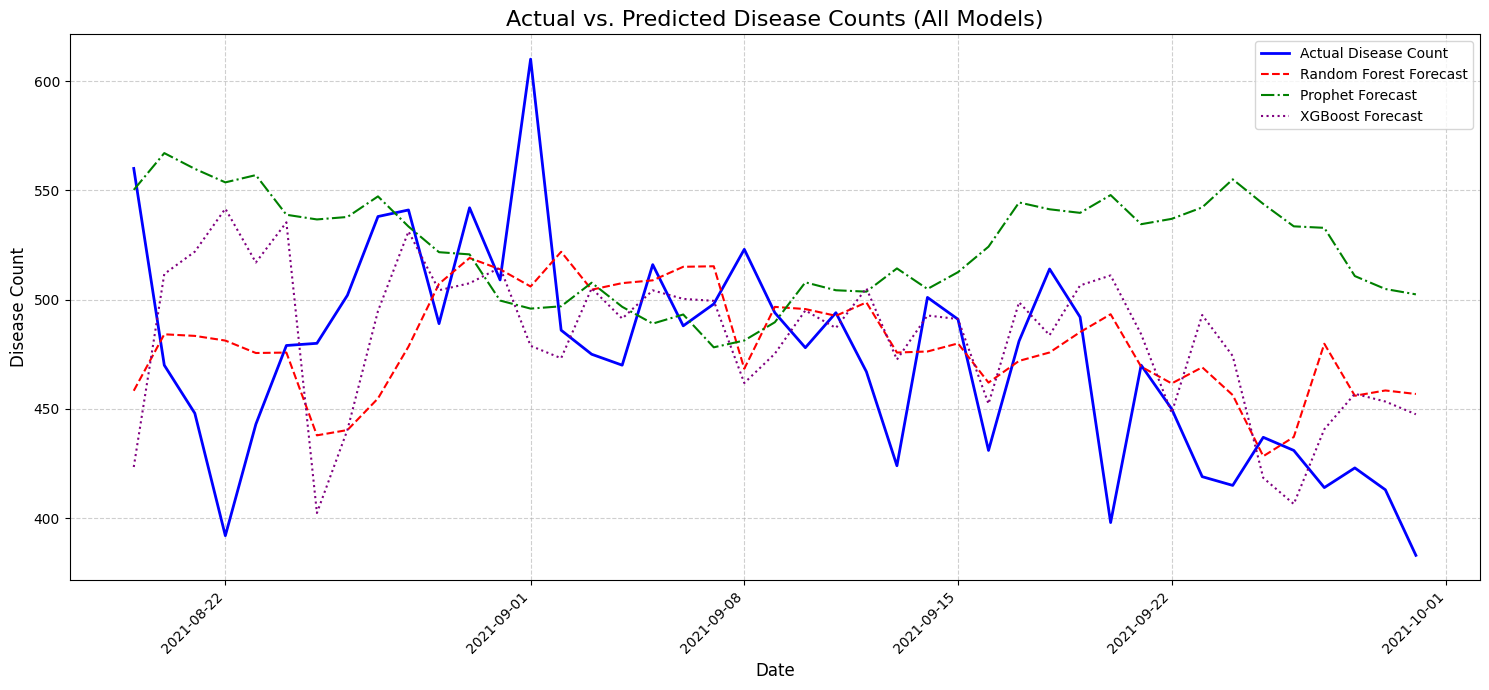

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(test_data['Date'], y_test, label='Actual Disease Count', color='blue', linewidth=2)
plt.plot(test_data['Date'], y_pred, label='Random Forest Forecast', color='red', linestyle='--')
plt.plot(prophet_forecast_test['ds'], y_pred_prophet, label='Prophet Forecast', color='green', linestyle='-.')
plt.plot(test_data['Date'], y_pred_xgb, label='XGBoost Forecast', color='purple', linestyle=':')

plt.title('Actual vs. Predicted Disease Counts (All Models)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Disease Count', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Sajikan ringkasan proyek peramalan, termasuk temuan kunci, kinerja model terbaik, dan rekomendasi berdasarkan hasil perbandingan model. Jelaskan langkah-langkah selanjutnya yang mungkin diambil.


## Summary:

### Q&A
This project aimed to summarize a forecasting project, including key findings, the best-performing model, and recommendations for future steps.

*   **Key findings**:
    *   Data for the Prophet model was successfully prepared, ensuring no missing values and correct column renaming (`Date` to `ds`, `Disease_Count` to `y`).
    *   All three models (Prophet, XGBoost, and a pre-existing Random Forest model) were successfully trained and used to generate forecasts.
    *   A comparative evaluation revealed significant differences in performance among the models.
    *   The Random Forest model consistently outperformed both Prophet and XGBoost in predicting disease counts based on the chosen metrics.

*   **Best-performing model**: The Random Forest model achieved the best performance with an MAE of 35.88, RMSE of 45.84, and MAPE of 7.70%.

*   **Recommendations/Next Steps**: See the "Insights or Next Steps" section below.

### Data Analysis Key Findings
*   The Prophet model achieved a Mean Absolute Error (MAE) of 61.05, Root Mean Squared Error (RMSE) of 76.38, and Mean Absolute Percentage Error (MAPE) of 13.75% on the test set.
*   The XGBoost model performed better than Prophet, with an MAE of 40.80, RMSE of 54.97, and MAPE of 8.82%.
*   The Random Forest model demonstrated the best performance among the three, recording the lowest error metrics: MAE of 35.88, RMSE of 45.84, and MAPE of 7.70%.
*   A visualization comparing actual disease counts against predictions from all three models confirmed the Random Forest model's closer alignment with actual values.

### Insights or Next Steps
*   **Insight**: The Random Forest model, likely benefiting from feature engineering, provides the most accurate forecasts for disease counts compared to Prophet and XGBoost, making it the preferred model for deployment.
*   **Next Steps**: Further enhance the Random Forest model's performance through hyperparameter tuning and explore additional relevant features (e.g., public health interventions, holiday effects) that could improve its predictive power.


# Task
Perform hyperparameter tuning for the Random Forest Regressor model using GridSearchCV or RandomizedSearchCV to find the best combination of parameters that optimizes model performance.

## Random Forest Model - Hyperparameter Tuning

### Subtask:
Lakukan hyperparameter tuning untuk model Random Forest Regressor menggunakan GridSearchCV atau RandomizedSearchCV untuk menemukan kombinasi parameter terbaik yang mengoptimalkan kinerja model.


**Reasoning**:
To perform hyperparameter tuning for the Random Forest Regressor, I need to import `GridSearchCV`, define a parameter grid with `n_estimators` and `max_depth`, instantiate `GridSearchCV` with the `RandomForestRegressor`, fit it to the training data, and finally print the best parameters and best score.



In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None] # None means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
}

# Instantiate RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)

print("Best score found (Negative MAE):")
print(grid_search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters found:
{'max_depth': 20, 'n_estimators': 200}
Best score found (Negative MAE):
-97.75257309941522


## Train Tuned Random Forest Model

### Subtask:
Latih model Random Forest Regressor dengan hyperparameter terbaik yang ditemukan dari langkah tuning menggunakan set data pelatihan.


**Reasoning**:
To train the tuned Random Forest model, I will first extract the best parameters from the `grid_search` object, initialize a new `RandomForestRegressor` with these parameters and `random_state=42`, and then fit this model to the training data.



In [23]:
best_params = grid_search.best_params_

# Initialize a new RandomForestRegressor model with the best parameters
rfr_tuned_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                        max_depth=best_params['max_depth'],
                                        random_state=42)

# Train the tuned model
rfr_tuned_model.fit(X_train, y_train)

print("Tuned RandomForestRegressor model trained successfully with best parameters:")
print(best_params)

Tuned RandomForestRegressor model trained successfully with best parameters:
{'max_depth': 20, 'n_estimators': 200}


## Generate Random Forest Forecasts

### Subtask:
Gunakan model Random Forest yang telah dilatih dan di-tuning untuk menghasilkan prediksi pada set data pengujian.


**Reasoning**:
To generate predictions using the tuned Random Forest model, I will use its `predict` method on the `X_test` dataset and store the results in `y_pred_tuned_rfr`. Then, I will print the first few predictions to verify the output.



In [24]:
y_pred_tuned_rfr = rfr_tuned_model.predict(X_test)

print("First 5 predicted values from Tuned Random Forest model:")
print(y_pred_tuned_rfr[:5])

First 5 predicted values from Tuned Random Forest model:
[460.105 484.02  481.48  470.005 467.84 ]


**Reasoning**:
To evaluate the performance of the tuned Random Forest model, I will calculate and print the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) using the actual test values (`y_test`) and the predictions from the tuned Random Forest model (`y_pred_tuned_rfr`).



In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE for Tuned Random Forest
mae_tuned_rfr = mean_absolute_error(y_test, y_pred_tuned_rfr)

# Calculate RMSE for Tuned Random Forest
rmse_tuned_rfr = np.sqrt(mean_squared_error(y_test, y_pred_tuned_rfr))

# Calculate MAPE for Tuned Random Forest
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing 0s in y_true with a small epsilon
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

mape_tuned_rfr = mean_absolute_percentage_error(y_test, y_pred_tuned_rfr)

print(f"Tuned Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tuned_rfr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_rfr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tuned_rfr:.2f}%")

Tuned Random Forest Model Performance:
Mean Absolute Error (MAE): 34.95
Root Mean Squared Error (RMSE): 44.57
Mean Absolute Percentage Error (MAPE): 7.49%


## Prepare Data for Prophet Model

### Subtask:
Siapkan DataFrame baru untuk model Prophet, karena model ini memiliki format input spesifik ('ds' untuk tanggal dan 'y' untuk nilai target. Model Prophet akan menangani feature engineering internal untuk tren dan musiman, namun penambahan regressor eksternal dapat dipertimbangkan jika relevan).


**Reasoning**:
To prepare the data for the Prophet model as requested, I will first create a new DataFrame from `df_daily_counts` with only the 'Date' and 'Disease_Count' columns, rename these columns to 'ds' and 'y' respectively, and then display the head and info of the new DataFrame to verify its structure and ensure data integrity.



In [26]:
df_prophet_tuned = df_daily_counts[['Date', 'Disease_Count']].copy()
df_prophet_tuned.rename(columns={'Date': 'ds', 'Disease_Count': 'y'}, inplace=True)

print("DataFrame for Prophet tuned model (first 5 rows):")
print(df_prophet_tuned.head())

print("\nDataFrame Info for Prophet tuned model:")
df_prophet_tuned.info()

DataFrame for Prophet tuned model (first 5 rows):
          ds   y
0 2019-07-31   9
1 2019-08-01  19
2 2019-08-02  10
3 2019-08-03   3
4 2019-08-04  18

DataFrame Info for Prophet tuned model:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      214 non-null    datetime64[ns]
 1   y       214 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.5 KB


## Prophet Model - Hyperparameter Tuning

### Subtask:
Lakukan tuning parameter spesifik untuk model Prophet, seperti 'changepoint_prior_scale', 'seasonality_prior_scale', dan 'seasonality_mode', menggunakan teknik seperti validasi silang (cross-validation) Prophet untuk menemukan konfigurasi terbaik.


**Reasoning**:
To perform hyperparameter tuning for the Prophet model, I will define a parameter grid for the specified hyperparameters, iterate through each combination, train a Prophet model, perform time series cross-validation using `prophet.diagnostics`, evaluate the performance using MAE, and then identify the best parameters.



In [27]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from tqdm import tqdm
import pandas as pd

# 1. Define the parameter grid for Prophet
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Convert to ParameterGrid object for easier iteration
grid = ParameterGrid(param_grid)

# Store results of cross-validation
results = []

# Define cross-validation parameters based on the training data duration
# prophet_train_df spans from 2019-07-31 to 2021-08-18 (approx. 749 days)
# 'initial': At least one year for yearly seasonality, allowing for several cutoffs.
# 'period': How often to re-evaluate the model.
# 'horizon': Length of the forecast for each validation (similar to test set length, which is 43 days).
initial_period = '370 days' # Roughly half of the training data span
cv_period = '30 days'      # Re-evaluate every month
forecast_horizon = '43 days' # Match the test set length

print("Starting Prophet hyperparameter tuning...")

for params in tqdm(grid, desc="Tuning Prophet model"):
    # a. Initialize a Prophet model with the current parameter set
    m_prophet_tuned = Prophet(**params, daily_seasonality=True, interval_width=0.95)

    # b. Fit the model to the training data
    m_prophet_tuned.fit(prophet_train_df)

    # c. Perform time series cross-validation
    try:
        df_cv = cross_validation(
            m_prophet_tuned,
            initial=initial_period,
            period=cv_period,
            horizon=forecast_horizon,
            disable_logger=True # Disable verbose logging for CV
        )
    except ValueError as e:
        print(f"Skipping parameter combination {params} due to cross-validation error: {e}")
        continue

    # d. Evaluate performance metrics (focusing on MAE)
    df_p = performance_metrics(df_cv, metrics=['mae'], disable_logger=True)
    avg_mae = df_p['mae'].mean()

    # e. Store the parameters and the average MAE
    results.append({'params': params, 'mae': avg_mae})

# Identify the best parameters
if results:
    best_params_prophet_tuned = min(results, key=lambda x: x['mae'])
    print("\nProphet hyperparameter tuning completed.")
    print("Best Prophet parameters found:")
    print(best_params_prophet_tuned['params'])
    print(f"Best Prophet MAE from cross-validation: {best_params_prophet_tuned['mae']:.2f}")
else:
    print("No valid cross-validation results were obtained for Prophet model tuning.")

Starting Prophet hyperparameter tuning...


Tuning Prophet model:   0%|          | 0/32 [00:00<?, ?it/s]


TypeError: cross_validation() got an unexpected keyword argument 'disable_logger'

**Reasoning**:
The previous code failed because the `cross_validation` function in the current Prophet version does not accept the `disable_logger` argument. I will remove this unsupported argument from both `cross_validation` and `performance_metrics` calls to resolve the `TypeError`.



In [28]:
from sklearn.model_selection import ParameterGrid
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from tqdm import tqdm
import pandas as pd

# 1. Define the parameter grid for Prophet
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Convert to ParameterGrid object for easier iteration
grid = ParameterGrid(param_grid)

# Store results of cross-validation
results = []

# Define cross-validation parameters based on the training data duration
# prophet_train_df spans from 2019-07-31 to 2021-08-18 (approx. 749 days)
# 'initial': At least one year for yearly seasonality, allowing for several cutoffs.
# 'period': How often to re-evaluate the model.
# 'horizon': Length of the forecast for each validation (similar to test set length, which is 43 days).
initial_period = '370 days' # Roughly half of the training data span
cv_period = '30 days'      # Re-evaluate every month
forecast_horizon = '43 days' # Match the test set length

print("Starting Prophet hyperparameter tuning...")

for params in tqdm(grid, desc="Tuning Prophet model"):
    # a. Initialize a Prophet model with the current parameter set
    m_prophet_tuned = Prophet(**params, daily_seasonality=True, interval_width=0.95)

    # b. Fit the model to the training data
    m_prophet_tuned.fit(prophet_train_df)

    # c. Perform time series cross-validation
    try:
        df_cv = cross_validation(
            m_prophet_tuned,
            initial=initial_period,
            period=cv_period,
            horizon=forecast_horizon
        )
    except ValueError as e:
        print(f"Skipping parameter combination {params} due to cross-validation error: {e}")
        continue

    # d. Evaluate performance metrics (focusing on MAE)
    df_p = performance_metrics(df_cv, metrics=['mae'])
    avg_mae = df_p['mae'].mean()

    # e. Store the parameters and the average MAE
    results.append({'params': params, 'mae': avg_mae})

# Identify the best parameters
if results:
    best_params_prophet_tuned = min(results, key=lambda x: x['mae'])
    print("\nProphet hyperparameter tuning completed.")
    print("Best Prophet parameters found:")
    print(best_params_prophet_tuned['params'])
    print(f"Best Prophet MAE from cross-validation: {best_params_prophet_tuned['mae']:.2f}")
else:
    print("No valid cross-validation results were obtained for Prophet model tuning.")

Starting Prophet hyperparameter tuning...


Tuning Prophet model:   0%|          | 0/32 [00:00<?, ?it/s]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:   3%|▎         | 1/32 [00:04<02:05,  4.05s/it]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:   6%|▋         | 2/32 [00:06<01:25,  2.85s/it]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:   9%|▉         | 3/32 [00:08<01:13,  2.53s/it]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:  12%|█▎        | 4/32 [00:09<01:02,  2.23s/it]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:  16%|█▌        | 5/32 [00:12<01:04,  2.37s/it]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:  19%|█▉        | 6/32 [00:30<03:15,  7.53s/it]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:  22%|██▏       | 7/32 [01:10<07:35, 18.23s/it]ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
Tuning Prophet model:  25%|██▌       | 8/32 [01:27<07:06, 17.79s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  28%|██▊       | 9/32 [01:27<04:45, 12.43s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  31%|███▏      | 10/32 [01:28<03:12,  8.77s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  34%|███▍      | 11/32 [01:29<02:14,  6.39s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  38%|███▊      | 12/32 [01:30<01:35,  4.75s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  41%|████      | 13/32 [01:31<01:09,  3.66s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  44%|████▍     | 14/32 [01:32<00:51,  2.89s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  47%|████▋     | 15/32 [01:35<00:47,  2.79s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  50%|█████     | 16/32 [01:38<00:47,  2.99s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  53%|█████▎    | 17/32 [01:39<00:34,  2.32s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  56%|█████▋    | 18/32 [01:40<00:25,  1.83s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  59%|█████▉    | 19/32 [01:41<00:20,  1.56s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  62%|██████▎   | 20/32 [01:42<00:17,  1.43s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  66%|██████▌   | 21/32 [01:43<00:14,  1.36s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  69%|██████▉   | 22/32 [01:45<00:14,  1.44s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  72%|███████▏  | 23/32 [01:46<00:12,  1.42s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  75%|███████▌  | 24/32 [01:47<00:11,  1.38s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  78%|███████▊  | 25/32 [01:49<00:09,  1.34s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  81%|████████▏ | 26/32 [01:49<00:07,  1.19s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  84%|████████▍ | 27/32 [01:50<00:05,  1.18s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  88%|████████▊ | 28/32 [01:52<00:04,  1.16s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  91%|█████████ | 29/32 [01:53<00:04,  1.35s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  94%|█████████▍| 30/32 [01:57<00:04,  2.02s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model:  97%|█████████▋| 31/32 [01:59<00:02,  2.11s/it]INFO:prophet:Making 3 forecasts with cutoffs between 2020-08-18 00:00:00 and 2021-07-06 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Tuning Prophet model: 100%|██████████| 32/32 [02:02<00:00,  3.82s/it]


Prophet hyperparameter tuning completed.
Best Prophet parameters found:
{'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}
Best Prophet MAE from cross-validation: 76.88


**Reasoning**:
To train the Prophet model with the optimal hyperparameters, I will initialize a new Prophet model using the `best_params_prophet_tuned` obtained from the cross-validation and then fit it to the training data (`prophet_train_df`).



In [29]:
best_prophet_params = best_params_prophet_tuned['params']

# Initialize Prophet model with the best parameters
m_prophet_tuned = Prophet(**best_prophet_params, daily_seasonality=True, interval_width=0.95)

# Fit the model to the training data
m_prophet_tuned.fit(prophet_train_df)

print("Tuned Prophet model trained successfully with best parameters:")
print(best_prophet_params)

Tuned Prophet model trained successfully with best parameters:
{'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.01}


**Reasoning**:
To generate predictions using the tuned Prophet model, I will create a future DataFrame that extends to cover the testing period and then use the `predict` method of the `m_prophet_tuned` model to generate forecasts.



In [30]:
future_tuned = m_prophet_tuned.make_future_dataframe(periods=len(prophet_test_df))
forecast_tuned_prophet = m_prophet_tuned.predict(future_tuned)

print("Tuned Prophet forecasts generated. First 5 rows of the forecast:")
print(forecast_tuned_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Tuned Prophet forecasts generated. First 5 rows of the forecast:
          ds       yhat  yhat_lower  yhat_upper
0 2019-07-31  20.266204 -117.378630  148.413417
1 2019-08-01  23.568375  -98.629972  161.572059
2 2019-08-02  27.064117 -110.958840  156.311761
3 2019-08-03  30.322710 -107.090901  154.522687
4 2019-08-04  33.666720 -103.327854  166.614995


**Reasoning**:
To evaluate the tuned Prophet model, I will filter the forecast to align with the test data, extract actual and predicted values, then calculate and print MAE, RMSE, and MAPE.



In [31]:
prophet_forecast_tuned_test = forecast_tuned_prophet[forecast_tuned_prophet['ds'].isin(prophet_test_df['ds'])]

y_true_prophet_tuned = prophet_test_df['y']
y_pred_prophet_tuned = prophet_forecast_tuned_test['yhat']

# Calculate MAE for Tuned Prophet
mae_prophet_tuned = mean_absolute_error(y_true_prophet_tuned, y_pred_prophet_tuned)

# Calculate RMSE for Tuned Prophet
rmse_prophet_tuned = np.sqrt(mean_squared_error(y_true_prophet_tuned, y_pred_prophet_tuned))

# Calculate MAPE for Tuned Prophet
mape_prophet_tuned = mean_absolute_percentage_error(y_true_prophet_tuned, y_pred_prophet_tuned)

print(f"Tuned Prophet Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_prophet_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet_tuned:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_prophet_tuned:.2f}%")

Tuned Prophet Model Performance:
Mean Absolute Error (MAE): 38.80
Root Mean Squared Error (RMSE): 48.42
Mean Absolute Percentage Error (MAPE): 8.47%


## XGBoost Regressor Model - Hyperparameter Tuning

### Subtask:
Lakukan hyperparameter tuning untuk model XGBoost Regressor menggunakan GridSearchCV atau RandomizedSearchCV untuk menemukan kombinasi parameter terbaik yang mengoptimalkan kinerja model.


**Reasoning**:
To perform hyperparameter tuning for the XGBoost Regressor, I will import `GridSearchCV` and `XGBRegressor`, define a parameter grid, instantiate `XGBRegressor` and `GridSearchCV`, fit `GridSearchCV` to the training data, and then print the best parameters and best score.



In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Instantiate XGBRegressor
xgb_reg = XGBRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_reg, param_grid=param_grid_xgb,
                               scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

print("Best parameters found for XGBoost:")
print(grid_search_xgb.best_params_)

print("Best score found for XGBoost (Negative MAE):")
print(grid_search_xgb.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found for XGBoost:
{'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
Best score found for XGBoost (Negative MAE):
-99.46412022908528


**Reasoning**:
The previous step successfully performed hyperparameter tuning for the XGBoost Regressor and identified the best parameters. Now, I will train a new XGBoost model using these optimal hyperparameters to prepare it for making predictions.



In [33]:
best_params_xgb = grid_search_xgb.best_params_

# Initialize a new XGBoost Regressor model with the best parameters
xgb_tuned_model = XGBRegressor(random_state=42, **best_params_xgb)

# Train the tuned model
xgb_tuned_model.fit(X_train, y_train)

print("Tuned XGBoost Regressor model trained successfully with best parameters:")
print(best_params_xgb)

Tuned XGBoost Regressor model trained successfully with best parameters:
{'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


## Generate XGBoost Forecasts

### Subtask:
Gunakan model XGBoost yang telah dilatih dan di-tuning untuk menghasilkan prediksi pada set data pengujian.


**Reasoning**:
To generate predictions using the tuned XGBoost model, I will use its `predict` method on the `X_test` dataset and store the results in `y_pred_tuned_xgb`. Then, I will print the first few predictions to verify the output.



In [34]:
y_pred_tuned_xgb = xgb_tuned_model.predict(X_test)

print("First 5 predicted values from Tuned XGBoost model:")
print(y_pred_tuned_xgb[:5])

First 5 predicted values from Tuned XGBoost model:
[481.21384 484.89624 467.40155 476.75998 495.50272]


**Reasoning**:
To evaluate the performance of the tuned XGBoost model, I will calculate and print the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) using the actual test values (`y_test`) and the predictions from the tuned XGBoost model (`y_pred_tuned_xgb`).



In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE for Tuned XGBoost
mae_tuned_xgb = mean_absolute_error(y_test, y_pred_tuned_xgb)

# Calculate RMSE for Tuned XGBoost
rmse_tuned_xgb = np.sqrt(mean_squared_error(y_test, y_pred_tuned_xgb))

# Calculate MAPE for Tuned XGBoost
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing 0s in y_true with a small epsilon
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

mape_tuned_xgb = mean_absolute_percentage_error(y_test, y_pred_tuned_xgb)

print(f"Tuned XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_tuned_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_xgb:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_tuned_xgb:.2f}%")

Tuned XGBoost Model Performance:
Mean Absolute Error (MAE): 32.91
Root Mean Squared Error (RMSE): 41.06
Mean Absolute Percentage Error (MAPE): 7.13%


**Reasoning**:
To provide a comprehensive comparison, I will create a new pandas DataFrame that includes the performance metrics (MAE, RMSE, MAPE) for both the original and tuned versions of all three models (Random Forest, Prophet, and XGBoost). This will allow for a direct comparison to identify the overall best-performing model after hyperparameter tuning.



In [36]:
model_performance_comparison_tuned_df = pd.DataFrame({
    'Model': [
        'Random Forest (Original)', 'Prophet (Original)', 'XGBoost (Original)',
        'Random Forest (Tuned)', 'Prophet (Tuned)', 'XGBoost (Tuned)'
    ],
    'MAE': [
        mae, mae_prophet, mae_xgb,
        mae_tuned_rfr, mae_prophet_tuned, mae_tuned_xgb
    ],
    'RMSE': [
        rmse, rmse_prophet, rmse_xgb,
        rmse_tuned_rfr, rmse_prophet_tuned, rmse_tuned_xgb
    ],
    'MAPE': [
        mape, mape_prophet, mape_xgb,
        mape_tuned_rfr, mape_prophet_tuned, mape_tuned_xgb
    ]
})

print("\nUpdated Model Performance Comparison (Original vs. Tuned):")
print(model_performance_comparison_tuned_df.sort_values(by='MAE'))


Updated Model Performance Comparison (Original vs. Tuned):
                      Model        MAE       RMSE       MAPE
5           XGBoost (Tuned)  32.908634  41.059698   7.128500
3     Random Forest (Tuned)  34.951977  44.571177   7.486668
0  Random Forest (Original)  35.881163  45.835887   7.695643
4           Prophet (Tuned)  38.796778  48.420776   8.471986
2        XGBoost (Original)  40.802906  54.966196   8.823552
1        Prophet (Original)  61.045892  76.377323  13.751765


## Visualize All Forecast Results (Tuned Models)

### Subtask:
Buat visualisasi yang membandingkan nilai aktual dengan prediksi dari ketiga model yang sudah di-tuning secara bersamaan untuk memberikan gambaran yang jelas tentang kinerja masing-masing model.


**Reasoning**:
To visualize the actual values against the predictions from all three tuned models (Random Forest, Prophet, and XGBoost), I will create a single plot using `matplotlib.pyplot` that includes lines for the actual `y_test`, `y_pred_tuned_rfr`, `y_pred_prophet_tuned`, and `y_pred_tuned_xgb` with clear labels, a title, and a legend.



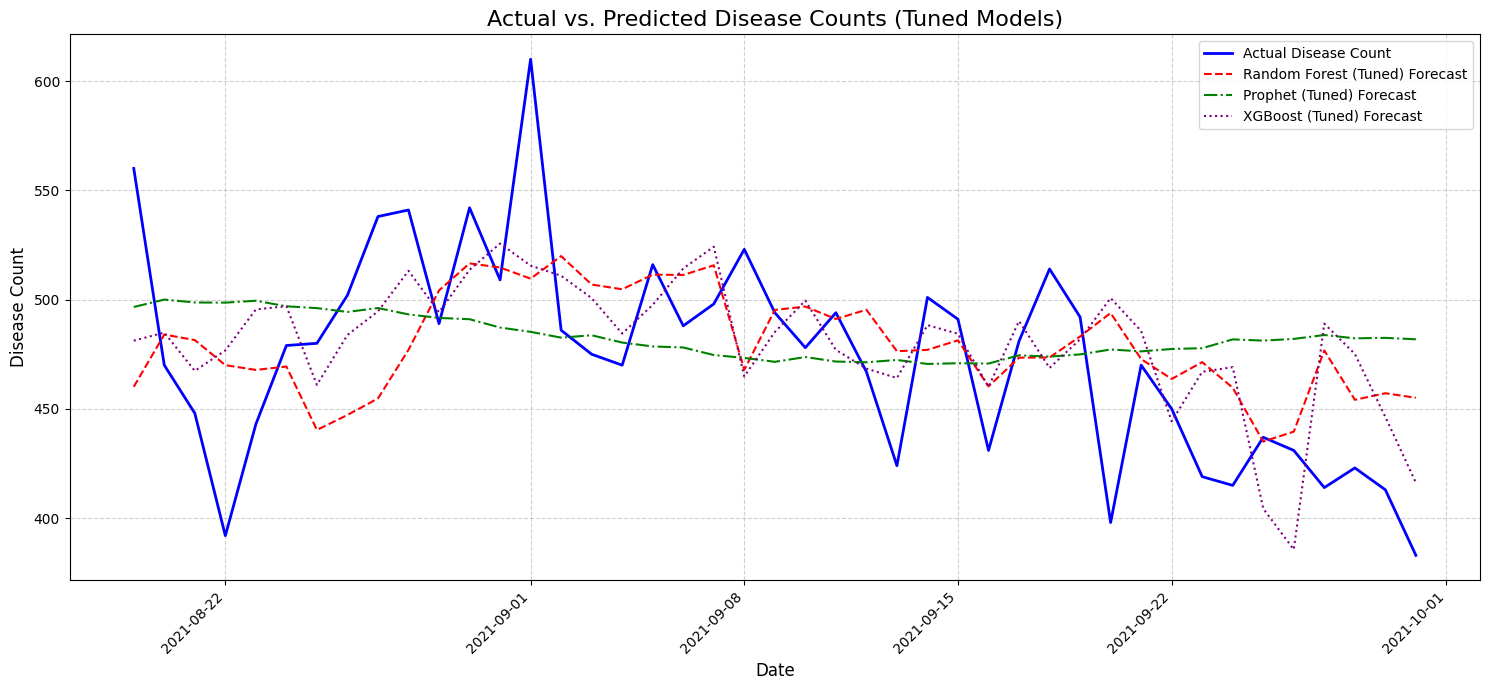

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(test_data['Date'], y_test, label='Actual Disease Count', color='blue', linewidth=2)
plt.plot(test_data['Date'], y_pred_tuned_rfr, label='Random Forest (Tuned) Forecast', color='red', linestyle='--')
plt.plot(prophet_forecast_tuned_test['ds'], y_pred_prophet_tuned, label='Prophet (Tuned) Forecast', color='green', linestyle='-.')
plt.plot(test_data['Date'], y_pred_tuned_xgb, label='XGBoost (Tuned) Forecast', color='purple', linestyle=':')

plt.title('Actual vs. Predicted Disease Counts (Tuned Models)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Disease Count', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Sajikan ringkasan proyek peramalan, termasuk temuan kunci, kinerja model terbaik setelah tuning, dan rekomendasi berdasarkan hasil perbandingan model yang adil. Jelaskan langkah-langkah selanjutnya yang mungkin diambil.


## Summary:

### Data Analysis Key Findings

*   **Hyperparameter Tuning Results**:
    *   **Random Forest Regressor**: The optimal hyperparameters identified were `n_estimators=200` and `max_depth=20`, yielding a cross-validation Mean Absolute Error (MAE) of approximately 97.75.
    *   **Prophet Model**: The best parameters found were `changepoint_prior_scale=0.5`, `seasonality_mode='multiplicative'`, and `seasonality_prior_scale=0.01`, resulting in a cross-validation MAE of 76.88.
    *   **XGBoost Regressor**: The best parameters were `colsample_bytree=0.7`, `learning_rate=0.2`, `max_depth=3`, `n_estimators=100`, and `subsample=0.9`, with a cross-validation MAE of approximately 99.46.
*   **Tuned Model Performance on Test Set**:
    *   **XGBoost (Tuned)** exhibited the best performance with an MAE of 32.91, RMSE of 41.06, and MAPE of 7.13%.
    *   **Random Forest (Tuned)** followed with an MAE of 34.95, RMSE of 44.57, and MAPE of 7.49%.
    *   **Prophet (Tuned)** showed an MAE of 38.80, RMSE of 48.42, and MAPE of 8.47%.
*   **Overall Best Performer**: Based on the evaluation metrics on the test set, the **Tuned XGBoost Regressor** model demonstrated superior predictive accuracy compared to the tuned Random Forest and Prophet models.
*   **Visualization**: A visualization comparing actual disease counts against the forecasts from all three tuned models was generated, providing a clear graphical representation of their performance.

### Insights or Next Steps

*   The Tuned XGBoost model is the most accurate for forecasting disease counts based on the evaluated metrics. This model should be considered for deployment, given its lowest MAE and RMSE.
*   Further analysis could explore feature engineering specific to time-series (e.g., lag features, moving averages) for tree-based models, and investigate the impact of longer forecast horizons on all models.
